In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Python_Project_6_SVM.csv')
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [4]:
df.shape

(4894, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [6]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


there two quality class 1 and 0

In [7]:
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

###  barchart of Quality_Category value counts 

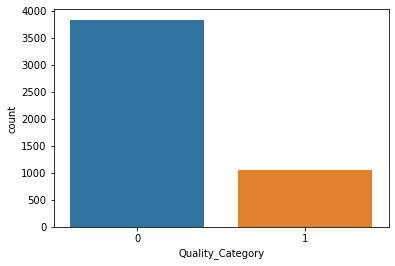

In [8]:
sns.countplot(x='Quality_Category', data=df);

### scatter plot between volatileacidity & citricacid 

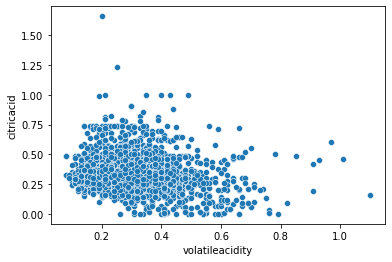

In [9]:
sns.scatterplot(x='volatileacidity', y='citricacid', data=df);

###  scatter plot between residualsuger & chlorides 

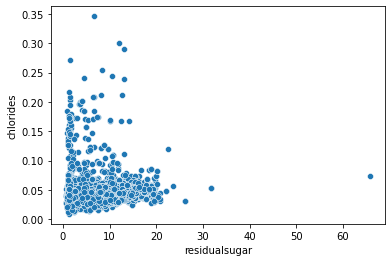

In [10]:
sns.scatterplot(x='residualsugar', y='chlorides', data=df);

### scatterplot between sulphates and alcohol 

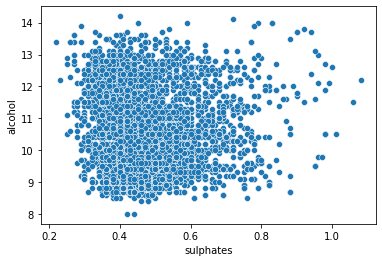

In [11]:
sns.scatterplot(x='sulphates', y='alcohol', data=df);

### histplot of dataset

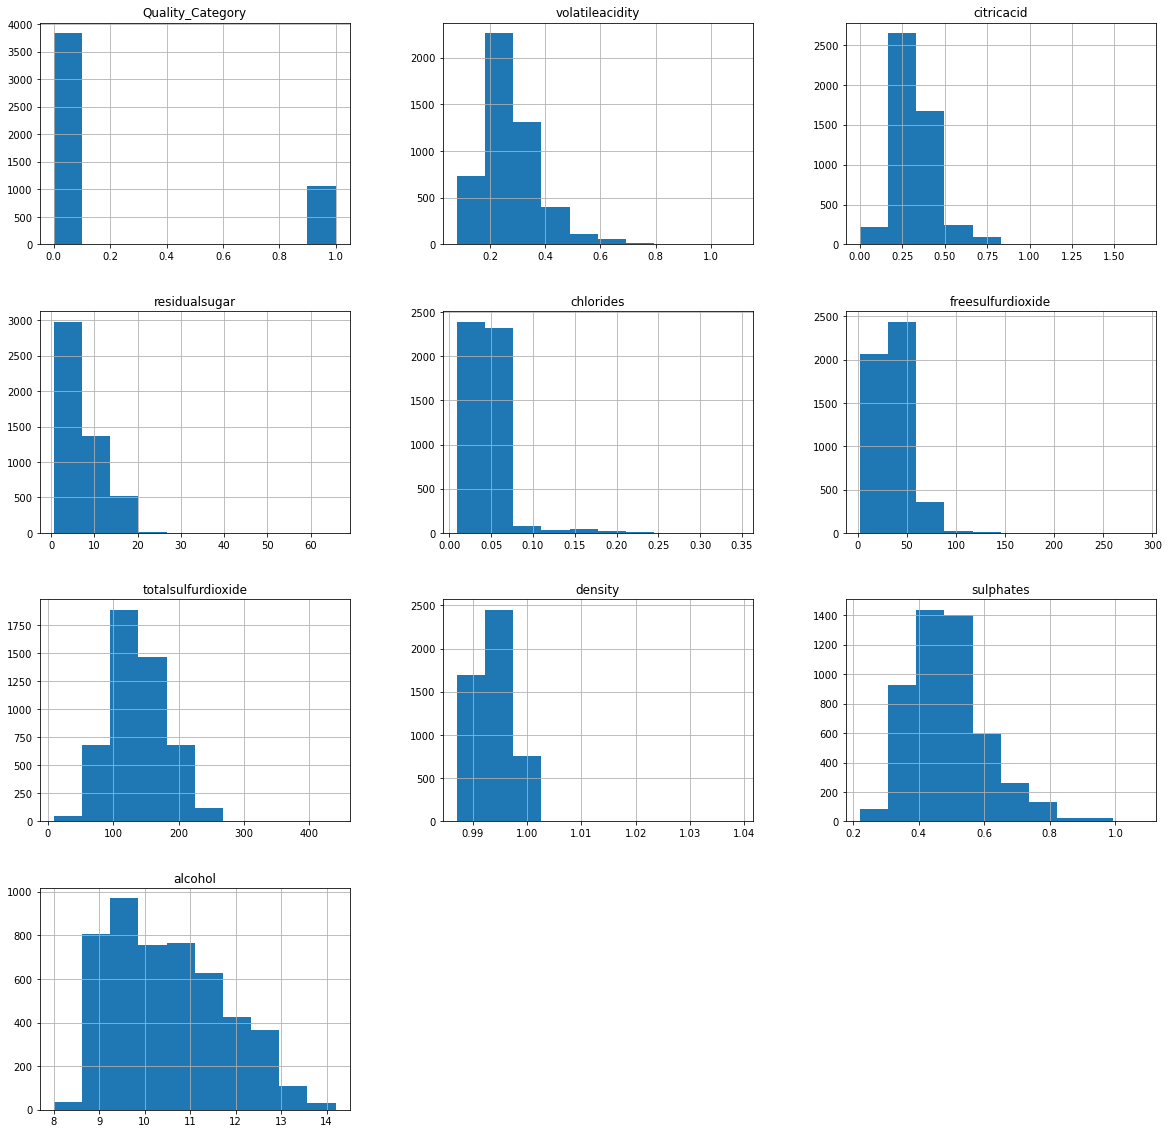

In [12]:
df.hist(figsize=(20,20));

In [13]:
df.isna().any()

Quality_Category      False
volatileacidity       False
citricacid            False
residualsugar         False
chlorides             False
freesulfurdioxide     False
totalsulfurdioxide    False
density               False
sulphates             False
alcohol               False
dtype: bool

In [14]:
X = df.drop(columns=['Quality_Category'], axis=1)

In [15]:
X.head()

,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [16]:
y = df.Quality_Category
y

0       0
1       0
2       0
3       0
4       0
       ..
4889    0
4890    0
4891    0
4892    1
4893    0
Name: Quality_Category, Length: 4894, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train, y_train)

SVC()

In [22]:
model.score(X_train, y_train)

0.7836526181353768

In [23]:
model.score(X_test, y_test)

0.7834525025536262

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [26]:
print(accuracy_score(y_test, y_pred))

0.7834525025536262


In [27]:
cn = confusion_matrix(y_test, y_pred)
cn

array([[767,   0],
       [212,   0]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       767
           1       0.00      0.00      0.00       212

    accuracy                           0.78       979
   macro avg       0.39      0.50      0.44       979
weighted avg       0.61      0.78      0.69       979



C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


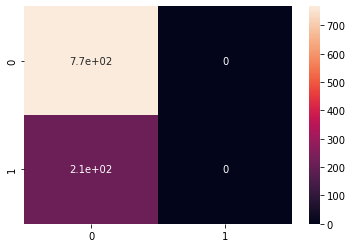

In [29]:
sns.heatmap(cn, annot=True)
plt.show()

## Changing Value of C

In [30]:
model_C = SVC(C=100)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7834525025536262

In [31]:
model.score(X_test, y_test)

0.7834525025536262

In [32]:
print(accuracy_score(y_test, y_pred))

0.7834525025536262


### Checking for multi-colinearity

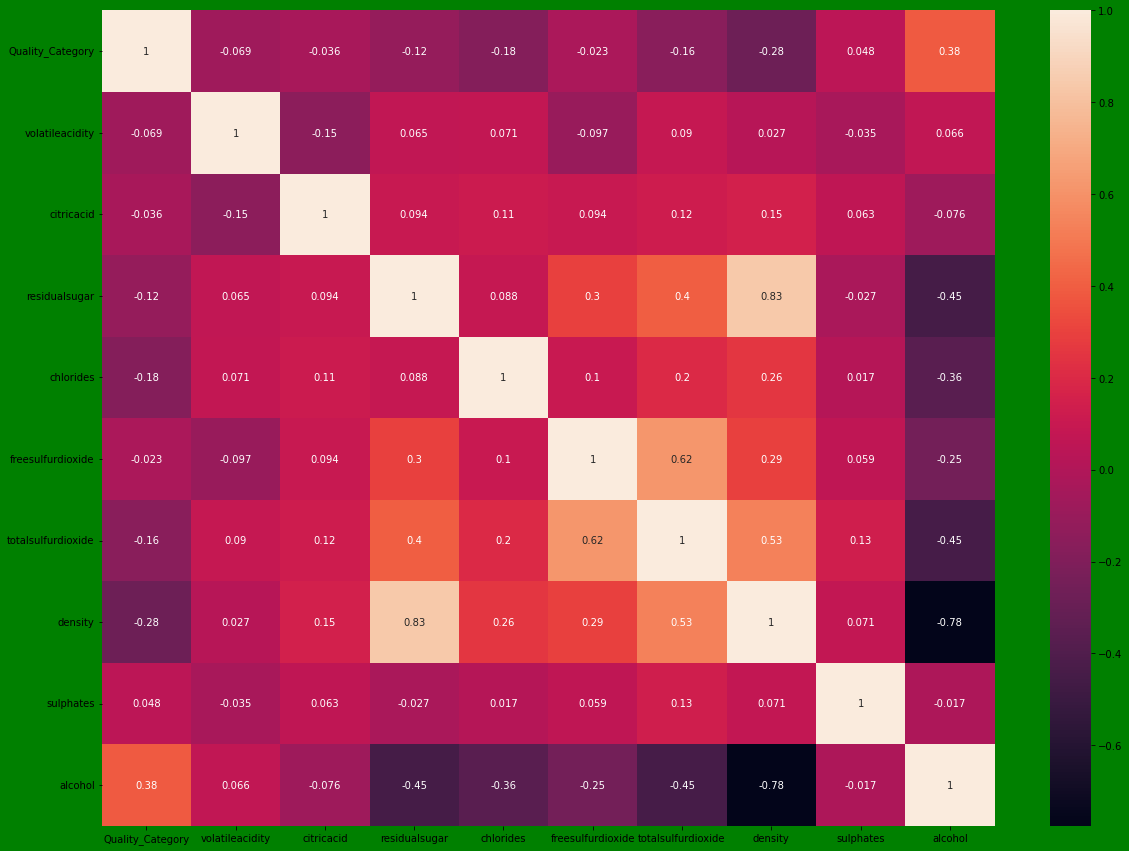

In [33]:
plt.figure(figsize=(20,15), facecolor='g')
sns.heatmap(df.corr(), annot=True)
plt.show()


here totalsulphur dioxide and  freesulphur dioxide are strongly co-related and Density and residual sugar are highly colrelated
so droping down it.

In [34]:
df2 = df.drop(columns=['totalsulfurdioxide', 'density'], axis=1)

In [35]:
X = df2.drop(columns=['Quality_Category'], axis=1)

In [36]:
y = df2.Quality_Category

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
model.fit(X_train, y_train)

SVC()

In [39]:
model.score(X_train, y_train)

0.7836526181353768

In [40]:
model.score(X_test, y_test)

0.7834525025536262

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       767
           1       0.00      0.00      0.00       212

    accuracy                           0.78       979
   macro avg       0.39      0.50      0.44       979
weighted avg       0.61      0.78      0.69       979



C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Let's Scale down data

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
X_train_scaled = sc.fit_transform(X_train)

In [46]:
X_test_scaled = sc.transform(X_test)

In [47]:
model.fit(X_train_scaled, y_train)

SVC()

In [48]:
model.score(X_test_scaled, y_test)

0.81511746680286

In [49]:
y_pred = model.predict(X_test_scaled)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       767
           1       0.69      0.27      0.39       212

    accuracy                           0.82       979
   macro avg       0.76      0.62      0.64       979
weighted avg       0.80      0.82      0.78       979



### Better compared to above as we can see for class 1 score imporoved

### Data set is highly imbalanced lets try to balance it

In [51]:
from imblearn.over_sampling import SMOTE

In [53]:

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    3835
1    3835
Name: Quality_Category, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

##### Scaling it again

In [55]:
X_train_scaled = sc.fit_transform(X_train)

In [56]:
X_test_scaled = sc.transform(X_test)

In [105]:
model = SVC(C=10, kernel='rbf')

In [106]:
model.fit(X_train_scaled, y_train)

SVC(C=10)

In [107]:
SVM = model.score(X_test_scaled, y_test)
SVM

0.8096479791395046

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       767
           1       0.76      0.91      0.83       767

    accuracy                           0.81      1534
   macro avg       0.82      0.81      0.81      1534
weighted avg       0.82      0.81      0.81      1534



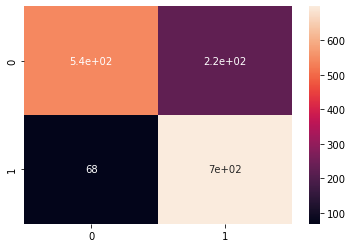

In [82]:
cn = confusion_matrix(y_test, y_pred)
cn
sns.heatmap(cn, annot=True)
plt.show()

### Here is the best model so far with both class having good score

### Checking Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression(penalty='l2', C=10)

In [109]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=10)

In [110]:
Log_reg = model.score(X_test_scaled, y_test)
Log_reg

0.7086049543676662

In [86]:
y_pred = model.predict(X_test_scaled)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       767
           1       0.70      0.73      0.72       767

    accuracy                           0.71      1534
   macro avg       0.71      0.71      0.71      1534
weighted avg       0.71      0.71      0.71      1534



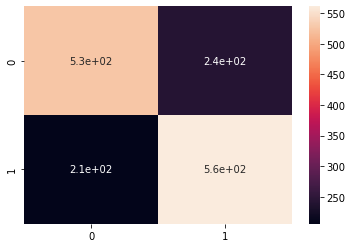

In [70]:
cn = confusion_matrix(y_test, y_pred)
cn
sns.heatmap(cn, annot=True)
plt.show()

### Checking for Decision Tree

In [89]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [90]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [104]:
D_Tree = model.score(X_test_scaled, y_test)
D_Tree

0.8402868318122555

In [92]:
y_pred = model.predict(X_test_scaled)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       767
           1       0.84      0.84      0.84       767

    accuracy                           0.84      1534
   macro avg       0.84      0.84      0.84      1534
weighted avg       0.84      0.84      0.84      1534



In [97]:
y_test

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [95]:
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [98]:
prediction_df = pd.DataFrame({'Test':y_test, "Prediction":y_pred})

In [100]:
prediction_df.head(20)

,Test,Prediction
1999,0,0
7566,1,1
5874,1,1
2864,0,0
948,0,0
4902,1,1
6733,1,1
1539,0,0
3219,0,0
406,0,0


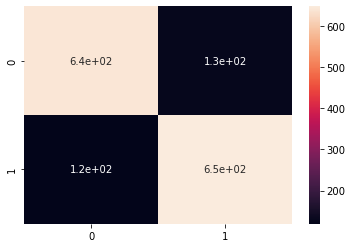

In [101]:
cn = confusion_matrix(y_test, y_pred)
cn
sns.heatmap(cn, annot=True)
plt.show()

## Here we get Best model out of all

In [114]:
Model_Comparision = pd.DataFrame({"Logistic_Regression": Log_reg, "SVM":SVM, "Decision_tree":D_Tree}, index=['Score'])

In [115]:
Model_Comparision

,Logistic_Regression,SVM,Decision_tree
Score,0.708605,0.809648,0.840287
